<a href="https://colab.research.google.com/github/SpyHecker/Machine-Learning-SPPU/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on Clustering Techniques
Download the following customer dataset from below link:

Data Set: https://www.kaggle.com/shwetabh123/mall-customers

This dataset gives the data of Income and money spent by the customers visiting a Shopping
Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score.
Therefore, as a mall owner you need to find the group of people who are the profitable
customers for the mall owner. Apply at least two clustering algorithms (based on Spending
Score) to find the group of customers.

A. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if
necessary.

B. Perform data-preparation( Train-Test Split)

C. Apply Machine Learning Algorithm

D. Evaluate Model.

E. Apply Cross-Validation and Evaluate Model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


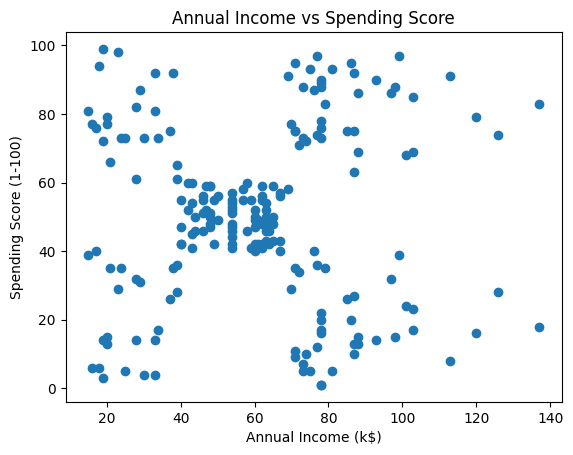

In [5]:
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.show()

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [7]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters=k)
    km.fit_predict(X)
    sse.append(km.inertia_)

In [8]:
sse

[269981.28000000014,
 184131.8850278851,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 39241.90172058874,
 31676.36973205365,
 29754.40421122995,
 21862.09267218289,
 20715.699936215155,
 19808.927093920567,
 17726.470284031206,
 15143.907522235697,
 14560.55686961714,
 13852.528729019534]

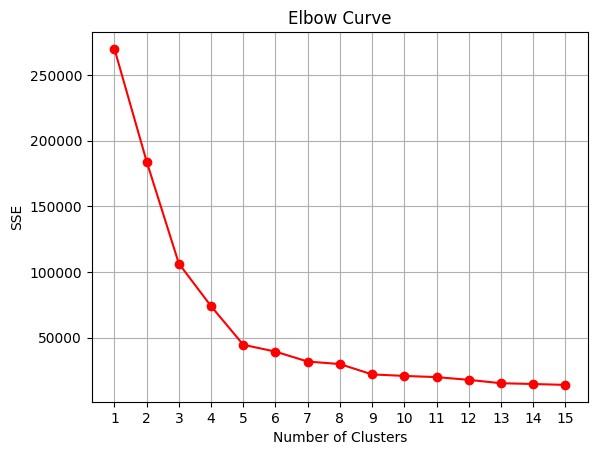

In [27]:
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1, 16), sse,marker='o',color='red')

In [10]:
psilh = []
for k in range(2,16):
  km = KMeans(n_clusters=k)
  km.fit_predict(X)
  score = silhouette_score(X, km.labels_)
  silh.append(score)

<BarContainer object of 14 artists>

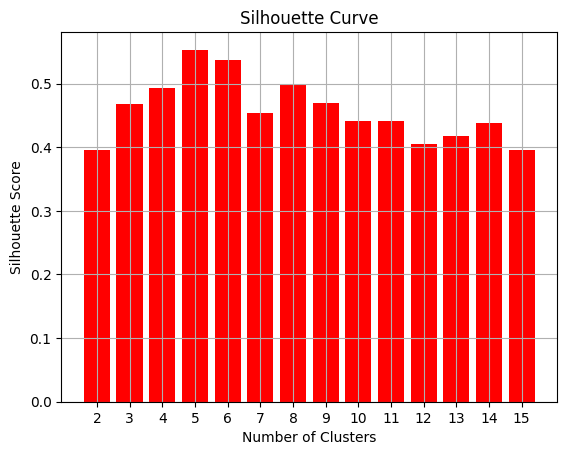

In [11]:
plt.title('Silhouette Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks(range(2, 16))
plt.bar(range(2, 16), silh, color='red')

In [12]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(X)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [13]:
km.cluster_centers_

array([[87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [14]:
km.inertia_

44454.47647967972

In [15]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [16]:
km.predict([[96,45]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [17]:
km.predict([[23,34]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [18]:
cent=km.cluster_centers_
cent

array([[87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

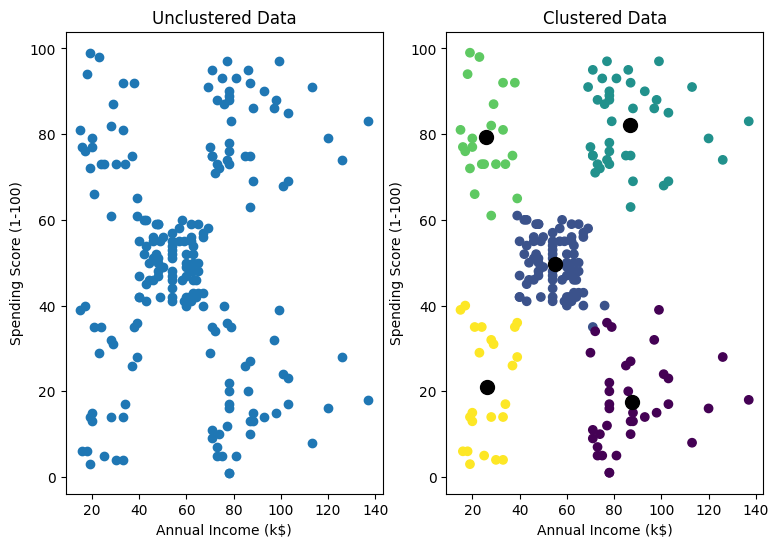

In [26]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='k')

In [20]:
agl = AgglomerativeClustering(n_clusters=5)
alabels = agl.fit_predict(X)
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

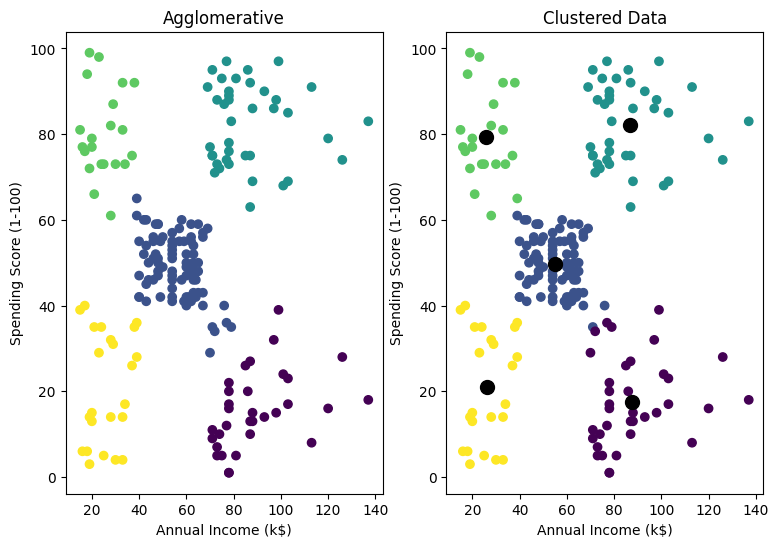

In [25]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.title('Agglomerative')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],c=alabels)

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='k')